In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('refined_census2011.csv')

plt.style.use('_mpl-gallery')

total_records = len(df)

print("Total number of records:", total_records)

print(df)


Total number of records: 569741
        Person ID     Region Residence Type  Family Composition  \
0         7394816  E12000001              H                   2   
1         7394745  E12000001              H                   5   
2         7395066  E12000001              H                   3   
3         7395329  E12000001              H                   3   
4         7394712  E12000001              H                   3   
...           ...        ...            ...                 ...   
569736    7946020  W92000004              H                   1   
569737    7944310  W92000004              H                   3   
569738    7945374  W92000004              H                   3   
569739    7944768  W92000004              H                   1   
569740    7944959  W92000004              H                   2   

        Population Base  Sex  Age  Marital Status  Student  Country of Birth  \
0                     1    2    6               2        2                 1   
1  

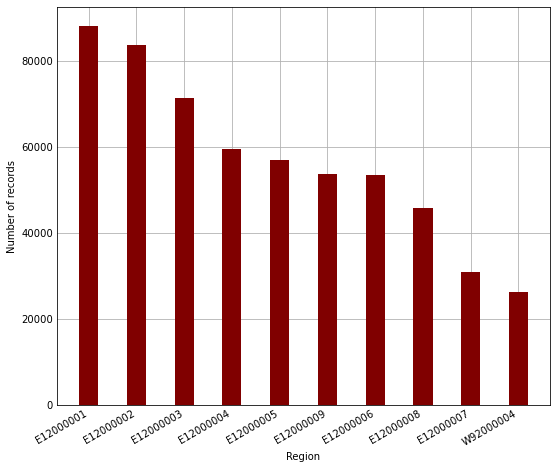

In [60]:
fig, ax = plt.subplots()
ax.bar(df.Region.unique(), df.Region.value_counts().to_numpy(), color ='maroon', width = 0.4)
plt.xlabel('Region')
plt.ylabel('Number of records')
fig.set_figwidth(7)
fig.set_figheight(7)
fig.autofmt_xdate()
plt.show()

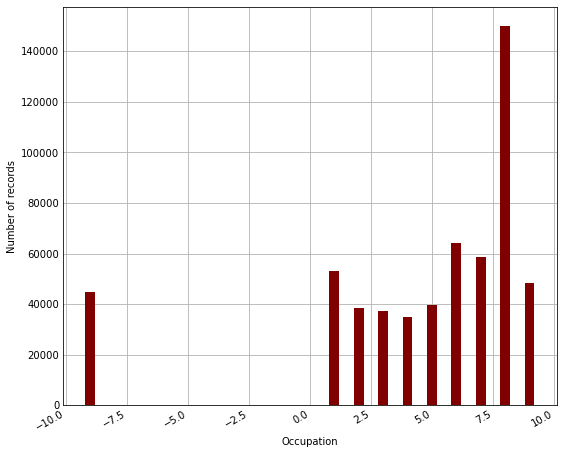

In [66]:
fig, ax = plt.subplots()
ax.bar(df.Occupation.unique(), df.Occupation.value_counts().to_numpy(), color ='maroon', width = 0.4)
plt.xlabel('Occupation')
plt.ylabel('Number of records')
fig.set_figwidth(7)
fig.set_figheight(7)
fig.autofmt_xdate()
plt.show()

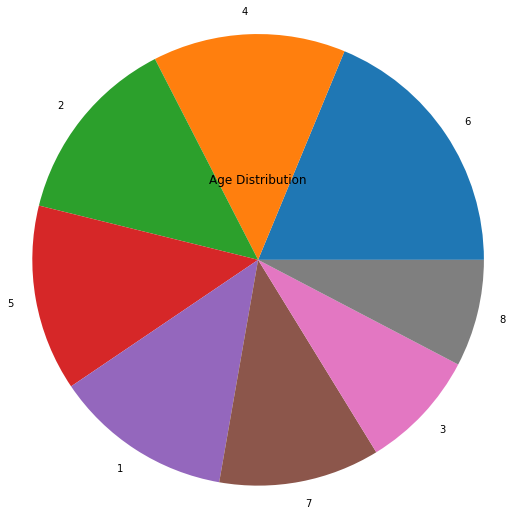

In [83]:
ages = df.Age.unique()
plt.pie(df.Age.value_counts().to_numpy(), labels = ages, radius = 4)
plt.title("Age Distribution")
plt.show()

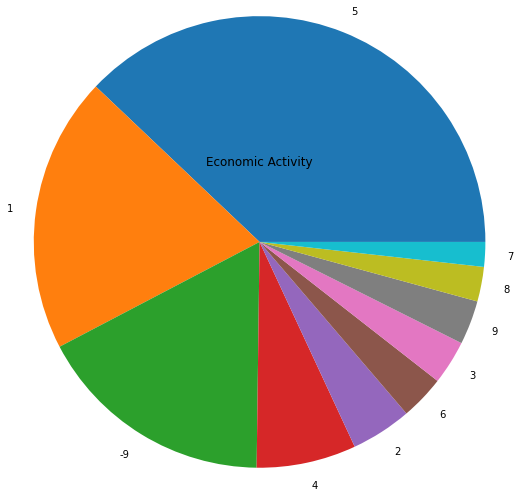

In [82]:
ages = df['Economic Activity'].unique()
plt.pie(df['Economic Activity'].value_counts().to_numpy(), labels = ages, radius = 4)
plt.title("Economic Activity")
plt.show()